<a href="https://colab.research.google.com/github/RyanRanjith/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data collection and processing

In [ ]:
# loading the csv data to Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first five rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# Information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlations
1.Positive correlation
2.Negative Correlation

In [ ]:
gold_data = gold_data.drop('Date',axis=1)

In [ ]:
correlation = gold_data.corr()

<Axes: >

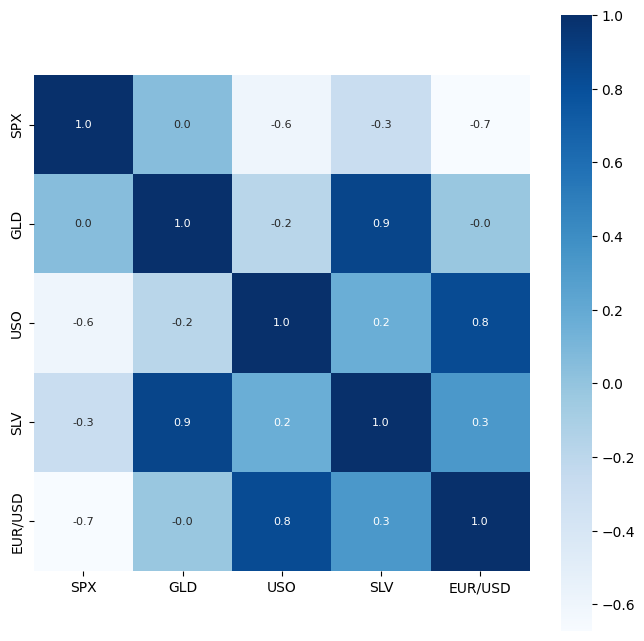

In [ ]:
# constructing a heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-ee97037607f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

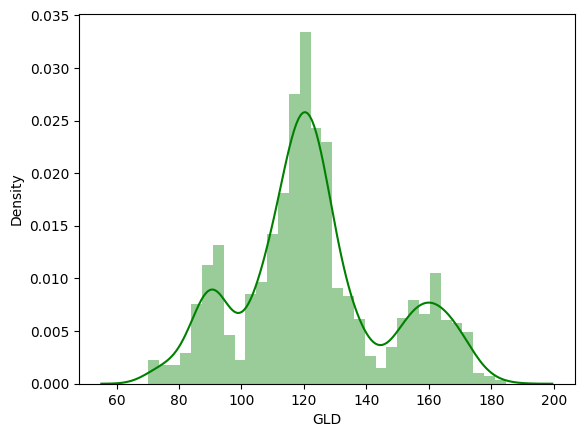

In [ ]:
# checking distribution of gold price
sns.distplot(gold_data['GLD'],color='green')


Splitting features and target

In [ ]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training:
Random forest regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.48659917  81.9881     115.94920015 127.66110119 120.71880153
 154.60199808 150.36159851 126.07640021 117.2473987  126.01530062
 116.53160099 171.49360123 141.34049867 167.83669869 115.12980007
 117.85230062 139.35830286 170.27280065 159.59950336 159.55539968
 155.13540017 125.40770002 175.33469965 157.14750354 125.07520058
  93.7450996   77.71440004 120.43700014 119.13489879 167.48299945
  88.06300066 125.37799992  91.09830078 117.45800089 121.07609906
 136.34520055 115.69840094 115.47270089 145.70970004 107.35230095
 104.25450253  87.30279804 126.32770043 117.82550014 154.76449907
 119.61910015 108.38489952 108.44949845  93.17950035 127.04169777
  75.11350021 113.6135992  121.24899999 111.30219903 118.85189869
 121.11049914 159.54550014 168.12830063 147.04329709  85.67729837
  94.34850027  86.72769914  90.4549003  118.81250099 126.49730026
 127.57239984 169.91699965 122.29409948 117.32999882  98.1886002
 168.35390153 143.15959863 132.31600257 121.11940209 121.34889948
 119.682400

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9895133426938603


Compare actual values and predicted values in matplot

In [ ]:
Y_test = list(Y_test)

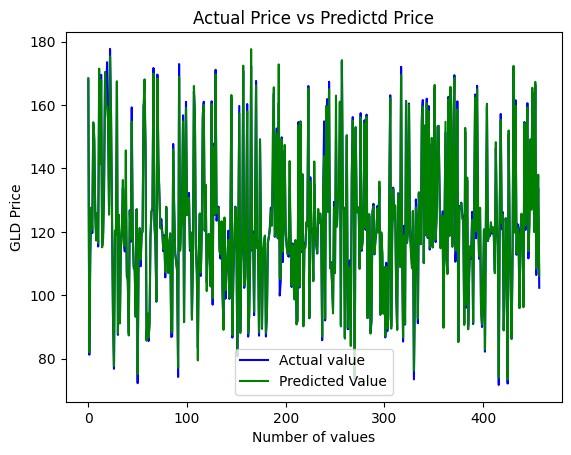

In [ ]:
plt.plot(Y_test,color='blue', label = 'Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predictd Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()